In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* Import dependencies packages of Python

In [57]:
import modules.eda as Detective
import pandas as pd

* Đọc dữ liệu từ project 1.

In [58]:
reviews = pd.read_csv("./data/normalize_reviews.csv").fillna("")

In [59]:
reviews

,raw_comment,label,normalize_comment,emoji
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,0,giao hàng không đúng cần phê bình,
1,Chất lượng sản phẩm tạm được. Giao...,0,chất lượng sản phẩm tạm được giao ...,
2,Ko có lắc tay như hình,0,không có lắc tay như hình,
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,0,giao hàng lâu bảo có lắc tay mà không ...,
4,"Mình mua 2 cái, một dùng ok. Một cái k...",0,mua cái một dùng ok một cái không chạ...,😢
5,"Đường may ko cẩn thận, đường ly lẽ ...",0,đường may không cẩn thận đường ly l...,
6,"Áo y hình, chất vải cũng đẹp. Form lên...",0,áo y hình chất vải cũng đẹp form lên o...,
7,Giao hàng nhanh\nmỗi tội áo hơi nhàu n...,0,giao hàng nhanh mỗi tội áo hơi nhàu nh...,
8,Màu già hơn hình mẫu mặc,0,màu già hơn hình mẫu mặc,
9,"vải nhăn, đường may k được đẹp, haizz...",0,vải nhăn đường may không được đẹp th...,


* Bây giờ ta sẽ tạo một feature có tên là `length` dùng để lưu chiều dài của feature `normalize_comment`.

In [60]:
reviews['length'] = reviews['normalize_comment'].str.len()

In [61]:
reviews.head()

,raw_comment,label,normalize_comment,emoji,length
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,0,giao hàng không đúng cần phê bình,,40
1,Chất lượng sản phẩm tạm được. Giao...,0,chất lượng sản phẩm tạm được giao ...,,79
2,Ko có lắc tay như hình,0,không có lắc tay như hình,,31
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,0,giao hàng lâu bảo có lắc tay mà không ...,,151
4,"Mình mua 2 cái, một dùng ok. Một cái k...",0,mua cái một dùng ok một cái không chạ...,😢,55


* Bây giờ chúng ta sẽ sắp xếp lại thứ tự của các feature trong `reviews`.

In [63]:
reviews = reviews[['raw_comment', 'normalize_comment', 'length', 'emoji', 'label']]

In [64]:
reviews.head()

,raw_comment,normalize_comment,length,emoji,label
0,Giao hàng kh đúng cần phê bình hjjjjjhhd...,giao hàng không đúng cần phê bình,40,,0
1,Chất lượng sản phẩm tạm được. Giao...,chất lượng sản phẩm tạm được giao ...,79,,0
2,Ko có lắc tay như hình,không có lắc tay như hình,31,,0
3,Giao hàng lâu. Bảo có lắc tay mà k thâ...,giao hàng lâu bảo có lắc tay mà không ...,151,,0
4,"Mình mua 2 cái, một dùng ok. Một cái k...",mua cái một dùng ok một cái không chạ...,55,😢,0


* Mặc dù ở project 1 chúng ta đã biết khá rõ ta đã làm mọi thử để ta có một dataset mà **cân bằng về số lượng observe ở các class**. Mặc dù vậy ta có thể trực quan hóa về số lượng các sample trong từng class của dataset này lên một biểu đồ nào đó. Vì ta chỉ có 2 class là **negative** và **positive** - nên pie chart sẽ là một biểu đồ lí tưởng để làm điều này.

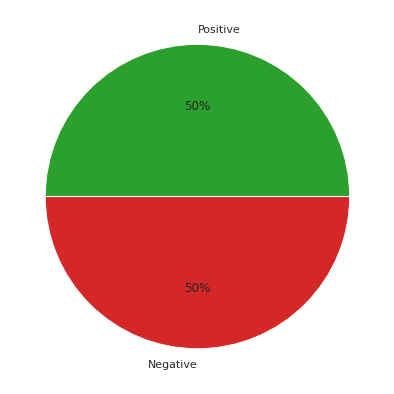

In [65]:
Detective.pieChart(reviews)

**Nhận xét**:
* Vì dữ liệu của ta ở project 1 ta đã làm nó có sự cân bằng giữa hai class, và với dataset này cũng chỉ có 2 class trong target variable nên ta chưa thấy được lợi ích của quá trình data visualization, nếu target variable của chúng ta có nhiều class hơn thì pie chart giúp ta thấy được class nào đang áp đảo các class nào hơn về mặt số lượng, tỉ lệ giữa các class - điều mà nếu chỉ nhìn bằng các con số ta đôi khi khó mường tượng và rất mơ hồ.

* Tiếp theo, chúng ta cũng cần đặt câu hỏi: "Liệu giữa negative và positive class, khách hàng của class nào có xu hướng sử dụng comment trong phần bình luận của họ hơn?".
* Vì ở đây, chúng ta đang **quan tâm về số lượng** nên bar chart là một biểu đồ đủ tốt để ta trực quan hóa được điều này.

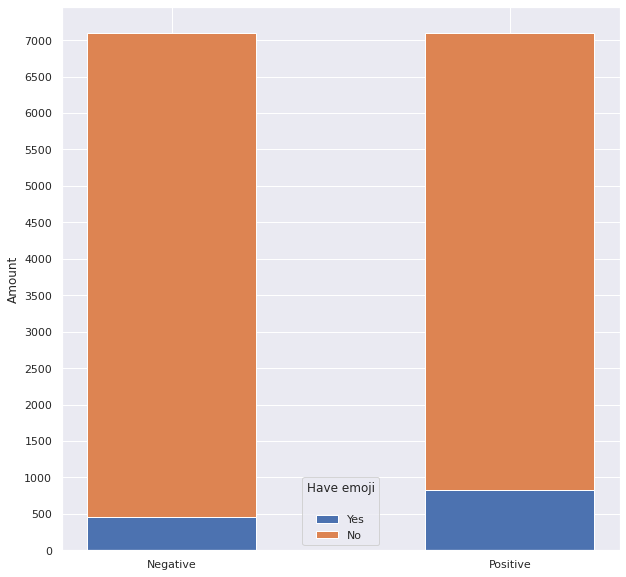

In [78]:
Detective.emojiClassBarplot(reviews)

> **Nhận xét**
> * Có thể thấy rằng số khách hàng thuộc nhóm positive có xu hướng sử dụng comment nhiều hơn trong comment của họ so với khách hàng nhóm negative, tuy nhiên khác biệt này cũng không quá lớn.
> * Ngoài ra, ta có thể thấy khách hàng trên shopee đa phần cũng sẽ không sử dụng emoji trong comment của mình cho lắm. Điển hình với khách hàng nhóm nagative, tỉ lệ khách hàng có dùng emoji trong comment của mình chỉ khoảng từ $(5, 7)$ phần trăm. Ở nhóm positive là khoảng $(10, 13)$ phần trăm.